In [12]:
import kagglehub
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost
import pandas
import matplotlib
import os
from xgboost import XGBClassifier
import joblib

df = kagglehub.dataset_download("mlg-ulb/creditcardfraud", force_download=False)
dataset_path = df
csv_path = os.path.join(dataset_path, "creditcard.csv")
data = pd.read_csv(csv_path)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
print("Dataset Shape:", data.shape)
print("\nColumns:", data.columns.tolist())
print("\nMissing Values:\n", data.isnull().sum().sum())  # Should be 0
print("\nClass Distribution:\n", data['Class'].value_counts(normalize=True))  # Fraud (1) vs. Non-Fraud (0)
print("\nFirst 5 Rows:\n", data.head())

Dataset Shape: (284807, 31)

Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Missing Values:
 0

Class Distribution:
 Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

First 5 Rows:
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.11047

In [ ]:
print(data['Amount'].describe())

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


<ipython-input-14-a32e06c87c10>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Class', data=data, palette=colors)


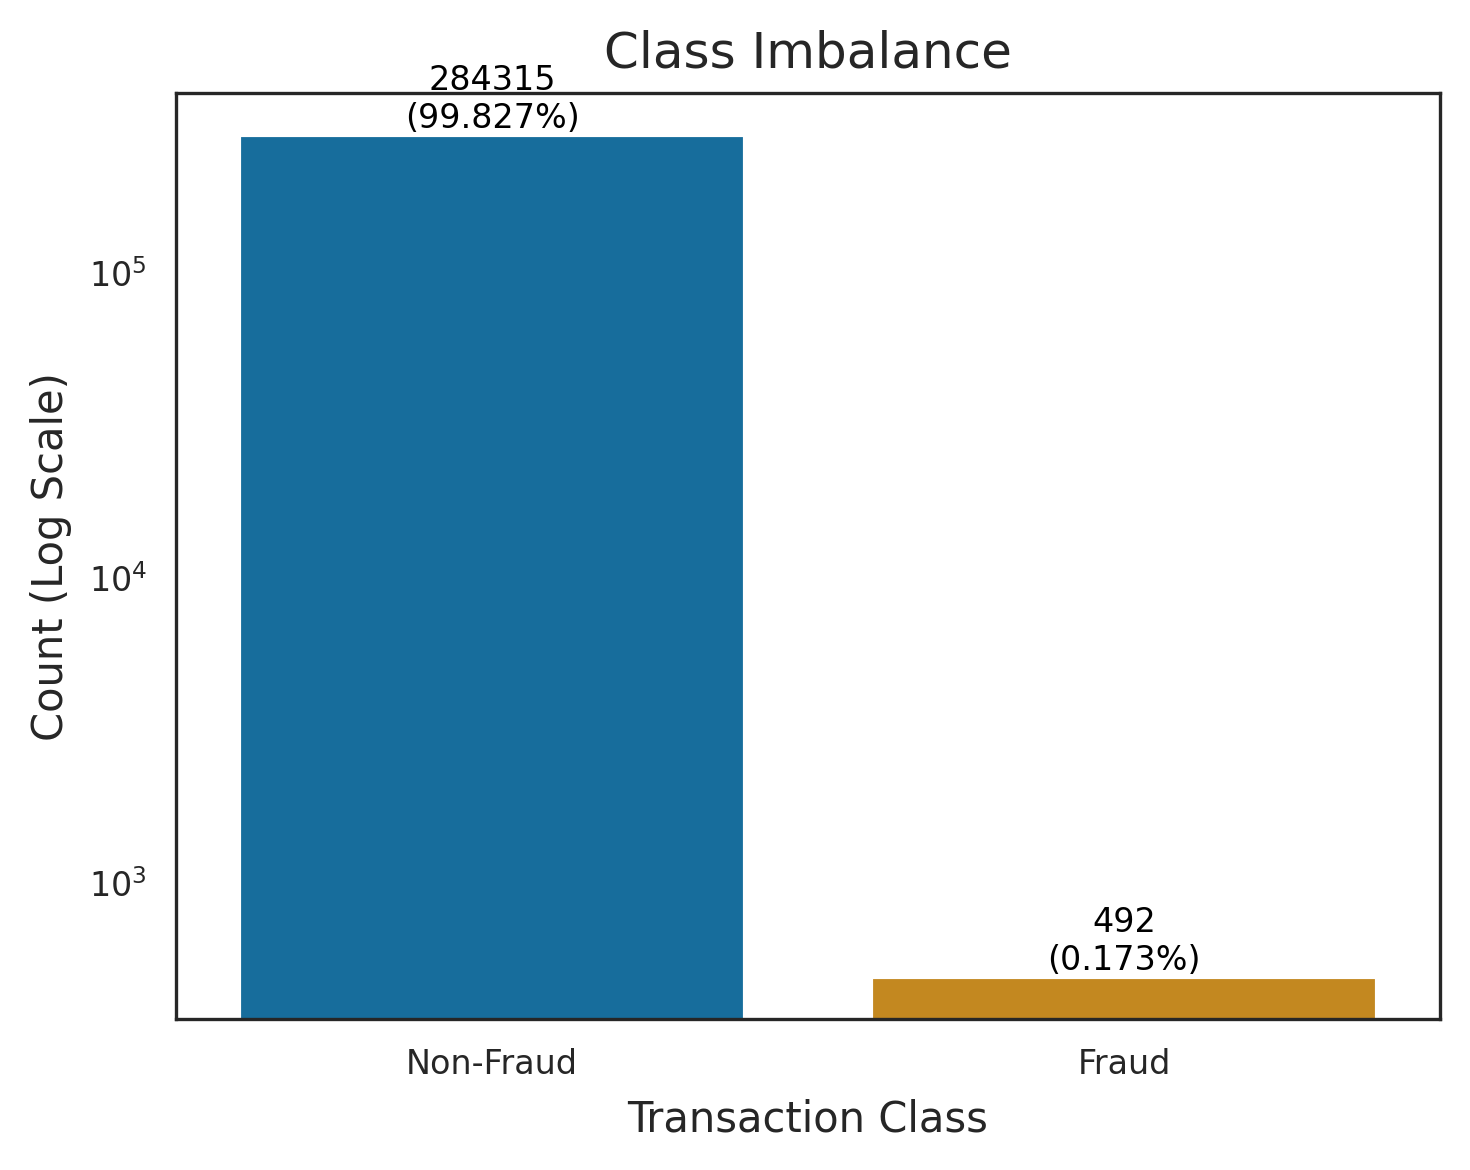

<Figure size 1920x1440 with 0 Axes>

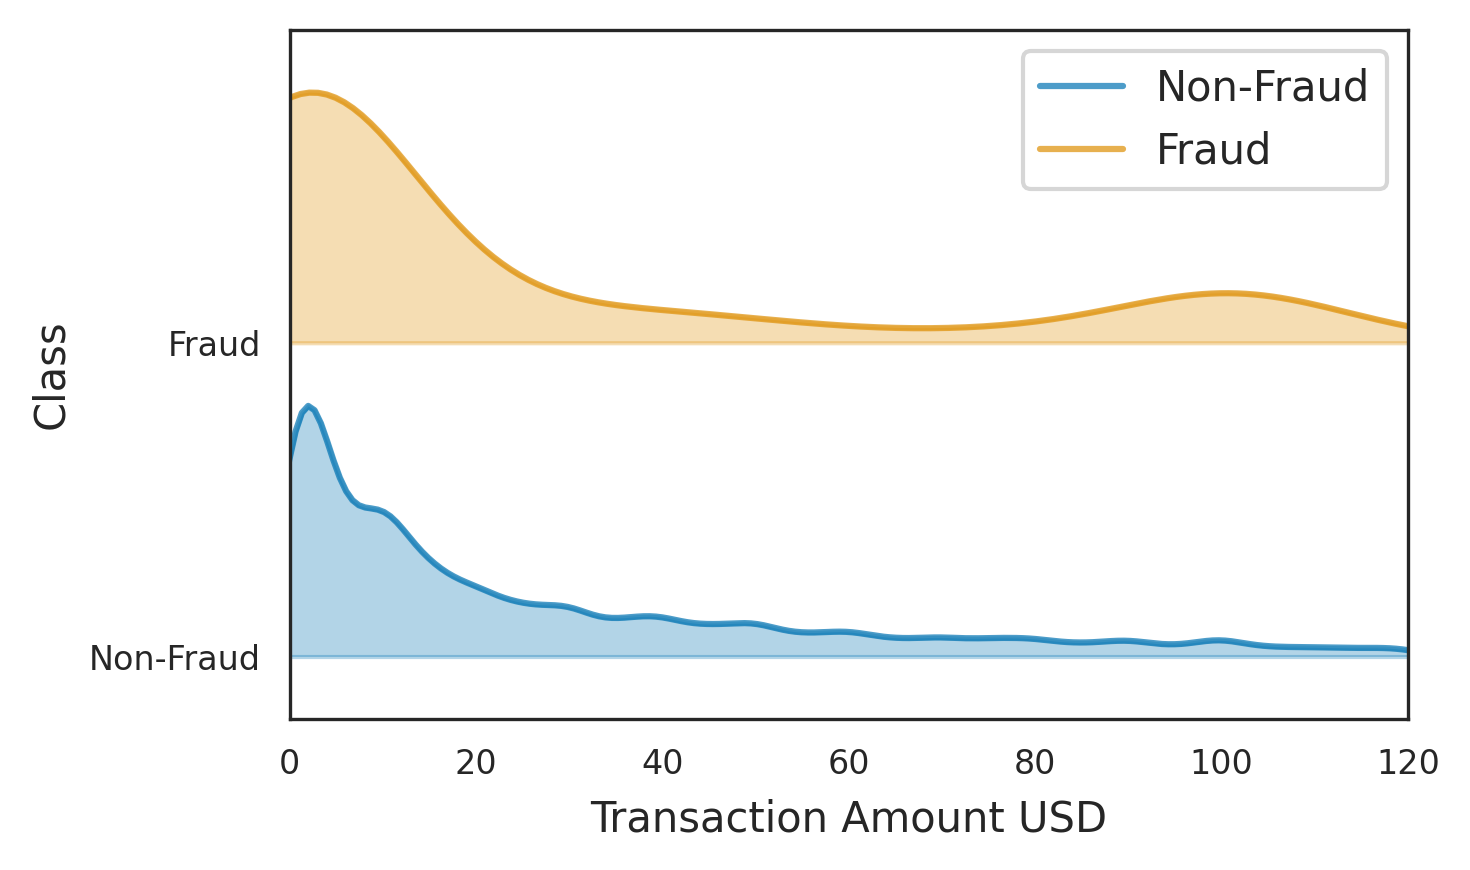

<Figure size 1920x1440 with 0 Axes>

In [14]:
#Plot figure setup
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 10,
    'axes.labelsize': 10,
    'axes.titlesize': 12,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.facecolor': 'white',
    'figure.facecolor': 'white'
})

sns.set_style('white')
colors = sns.color_palette("colorblind", 2)

# Plot 1: Class Imbalance Bar Plot (Log Scale)
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='Class', data=data, palette=colors)
plt.yscale('log')
plt.title('Class Imbalance')
plt.xlabel('Transaction Class')
plt.ylabel('Count (Log Scale)')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.grid(False)

total = len(data)
for p in ax.patches:
    count = int(p.get_height())
    percentage = (count / total) * 100
    ax.annotate(f'{count}\n({percentage:.3f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.savefig('class_imbalance_log.png', dpi=600, bbox_inches='tight')
plt.show()
plt.clf()

# Plot 2: Ridge Plot for Amount Distribution
data_filtered = data[data['Amount'].between(0, 120)].copy()
data_filtered['Class_Label'] = data_filtered['Class'].map({0: 'Non-Fraud', 1: 'Fraud'})
fig, ax = plt.subplots(figsize=(5, 3))
classes = ['Non-Fraud', 'Fraud']
offsets = [0, 0.5]

for idx, (cls, offset, color) in enumerate(zip(classes, offsets, colors)):
    subset = data_filtered[data_filtered['Class_Label'] == cls]['Amount']
    temp_fig, temp_ax = plt.subplots()
    sns.kdeplot(data=subset, ax=temp_ax, color=color)
    x, y = temp_ax.get_lines()[0].get_data()  # Get KDE data
    plt.close(temp_fig)  # Close temp figure
    y = y / y.max() * 0.4  # Scale density
    ax.fill_between(x, y + offset, offset, alpha=0.3, color=color)
    ax.plot(x, y + offset, color=color, alpha=0.7, label=cls)

ax.set_xlabel('Transaction Amount USD')
ax.set_ylabel('Class')
ax.set_yticks(offsets)
ax.set_yticklabels(classes)
ax.set_xlim(0, 120)
ax.set_ylim(-0.1, 1.0)
ax.grid(False)
ax.legend()
plt.tight_layout()
plt.savefig('amount_distribution_ridge.png', dpi=300, bbox_inches='tight')
plt.show()
plt.clf()

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])

X = data.drop('Class', axis=1)
Y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

print("Train Shape:", X_train.shape, y_train.shape)
print("Test Shape:", X_test.shape, y_test.shape)
print("Train Class Distribution:\n", y_train.value_counts(normalize=True))
print("Test Class Distribution:\n", y_test.value_counts(normalize=True))

data.to_csv('creditcard_clean.csv', index=False)
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

Train Shape: (227845, 30) (227845,)
Test Shape: (56962, 30) (56962,)
Train Class Distribution:
 Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64
Test Class Distribution:
 Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


X_train Shape: (227845, 30)
X_test Shape: (56962, 30)
y_train Shape: (227845,)
y_test Shape: (56962,)
y_train Class Distribution:
 0    0.998271
1    0.001729
Name: proportion, dtype: float64
Accuracy: 0.9995
Confusion Matrix:
 [[56853    11]
 [   16    82]]


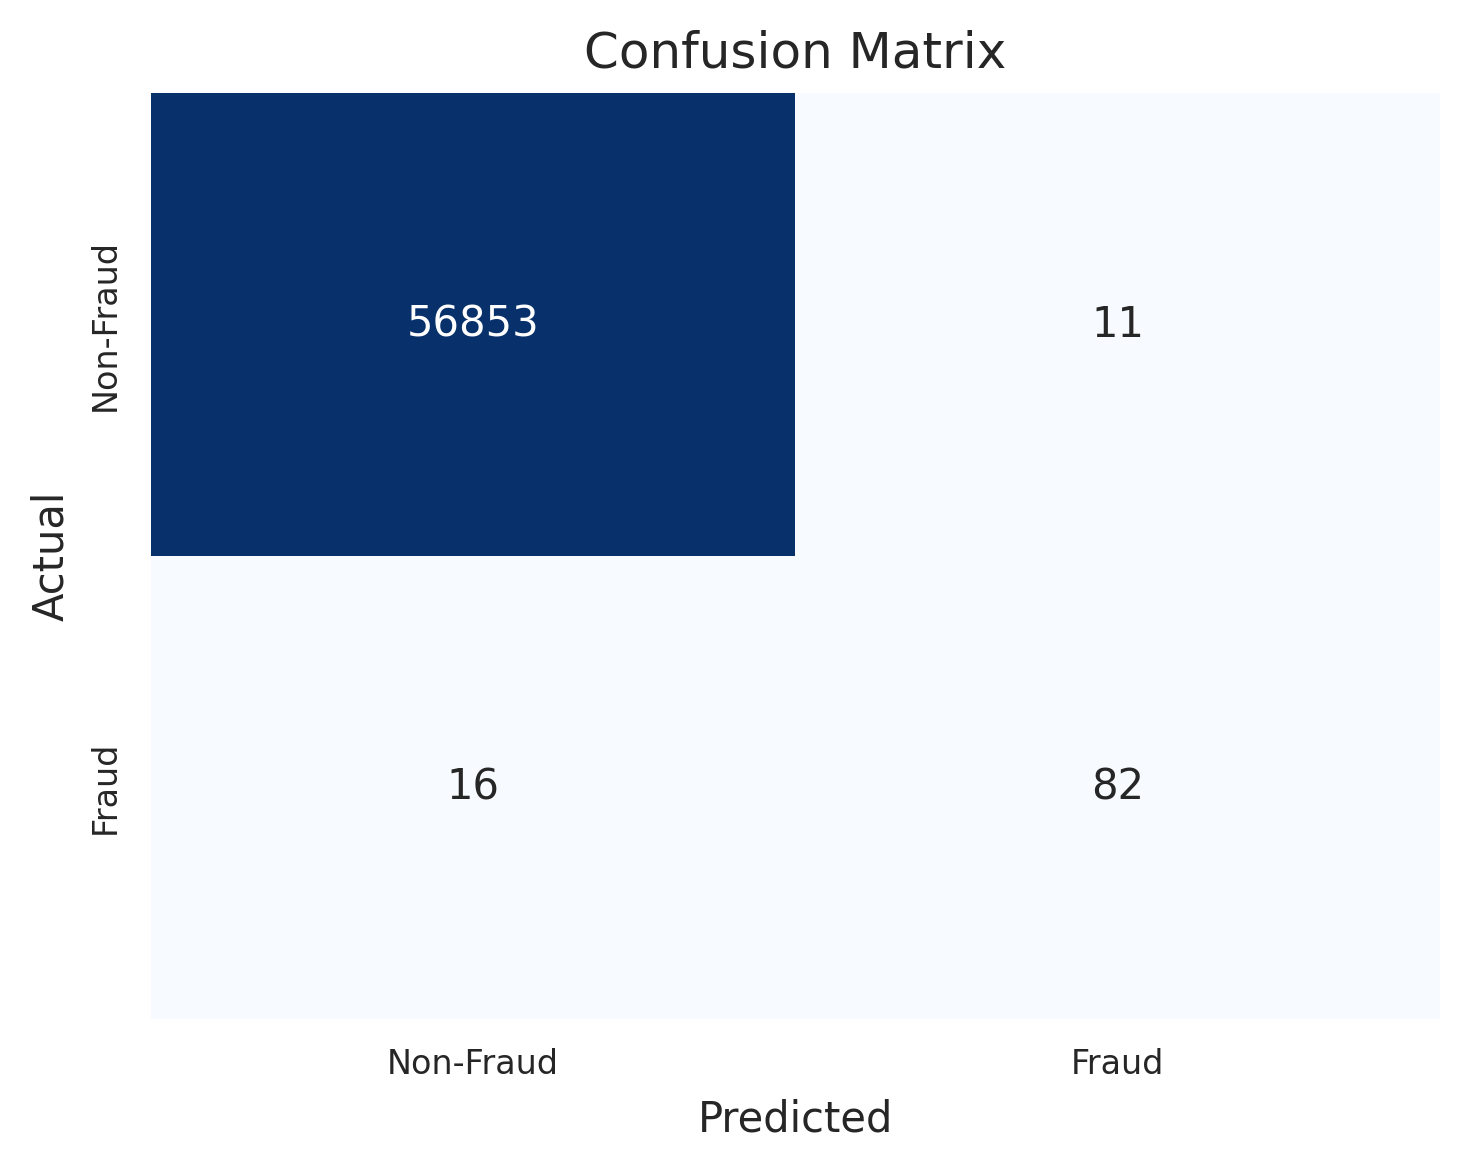

<Figure size 1920x1440 with 0 Axes>

In [18]:
from xgboost import XGBClassifier
import joblib

X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)
print("y_train Class Distribution:\n", pd.Series(y_train).value_counts(normalize=True))

# Train XGBoost with scale_pos_weight to deal with class imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
model = XGBClassifier(random_state=42, n_estimators=100, max_depth=6, scale_pos_weight=scale_pos_weight)
model.fit(X_train, y_train)

joblib.dump(model, 'xgboost_fraud_model_no_smote.pkl')

# Evaluation
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
cm = np.zeros((2, 2), dtype=int)
for i in range(len(y_test)):
    cm[y_test[i], y_pred[i]] += 1

# Metrics
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud', 'Fraud'])
plt.yticks([0.5, 1.5], ['Non-Fraud', 'Fraud'])
plt.grid(False)
plt.tight_layout()
plt.savefig('confusion_matrix_no_smote.png', dpi=300, bbox_inches='tight')
plt.show()
plt.clf()

Best Parameters: {'max_depth': 3, 'n_estimators': 50}
Best Model AUC-ROC: 0.9792
Best Model Precision: 0.2788
Best Model Recall: 0.8878
Best Model F1-Score: 0.4244
Best Model Confusion Matrix:
 [[56639   225]
 [   11    87]]


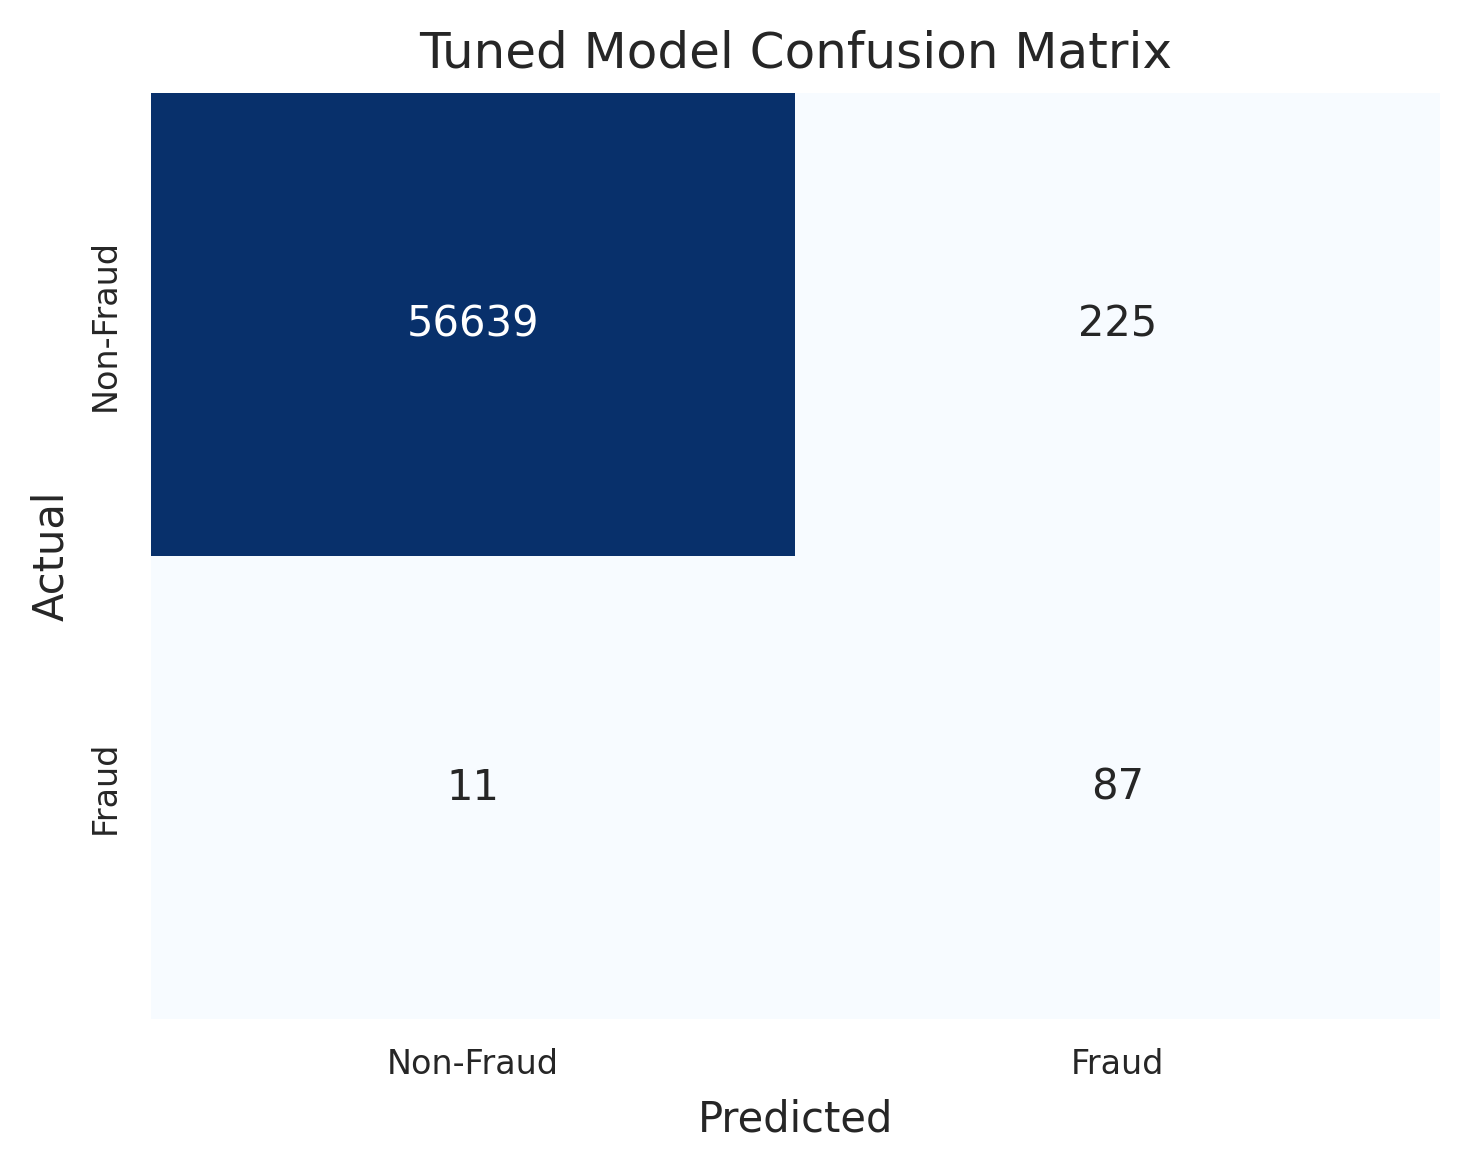

['xgboost_fraud_model_best.pkl']

<Figure size 1920x1440 with 0 Axes>

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Hyperparameter tuning
param_grid = {
    'max_depth': [3, 6],
    'n_estimators': [50, 100]
}
grid_search = GridSearchCV(XGBClassifier(random_state=42, eval_metric='auc',
                                         scale_pos_weight=scale_pos_weight),
                           param_grid,
                           scoring='recall',
                           cv=3,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]
auc_best = roc_auc_score(y_test, y_pred_proba_best)
precision_best, recall_best, f1_best, _ = precision_recall_fscore_support(y_test, y_pred_best, average='binary')
cm_best = confusion_matrix(y_test, y_pred_best)

# Print metrics
print(f"Best Model AUC-ROC: {auc_best:.4f}")
print(f"Best Model Precision: {precision_best:.4f}")
print(f"Best Model Recall: {recall_best:.4f}")
print(f"Best Model F1-Score: {f1_best:.4f}")
print("Best Model Confusion Matrix:\n", cm_best)

# Plot confusion matrix for best model
plt.figure(figsize=(5, 4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Tuned Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud', 'Fraud'])
plt.yticks([0.5, 1.5], ['Non-Fraud', 'Fraud'])
plt.grid(False)
plt.tight_layout()
plt.show()
plt.clf()

# Save best model
joblib.dump(best_model, 'xgboost_fraud_model_best.pkl')

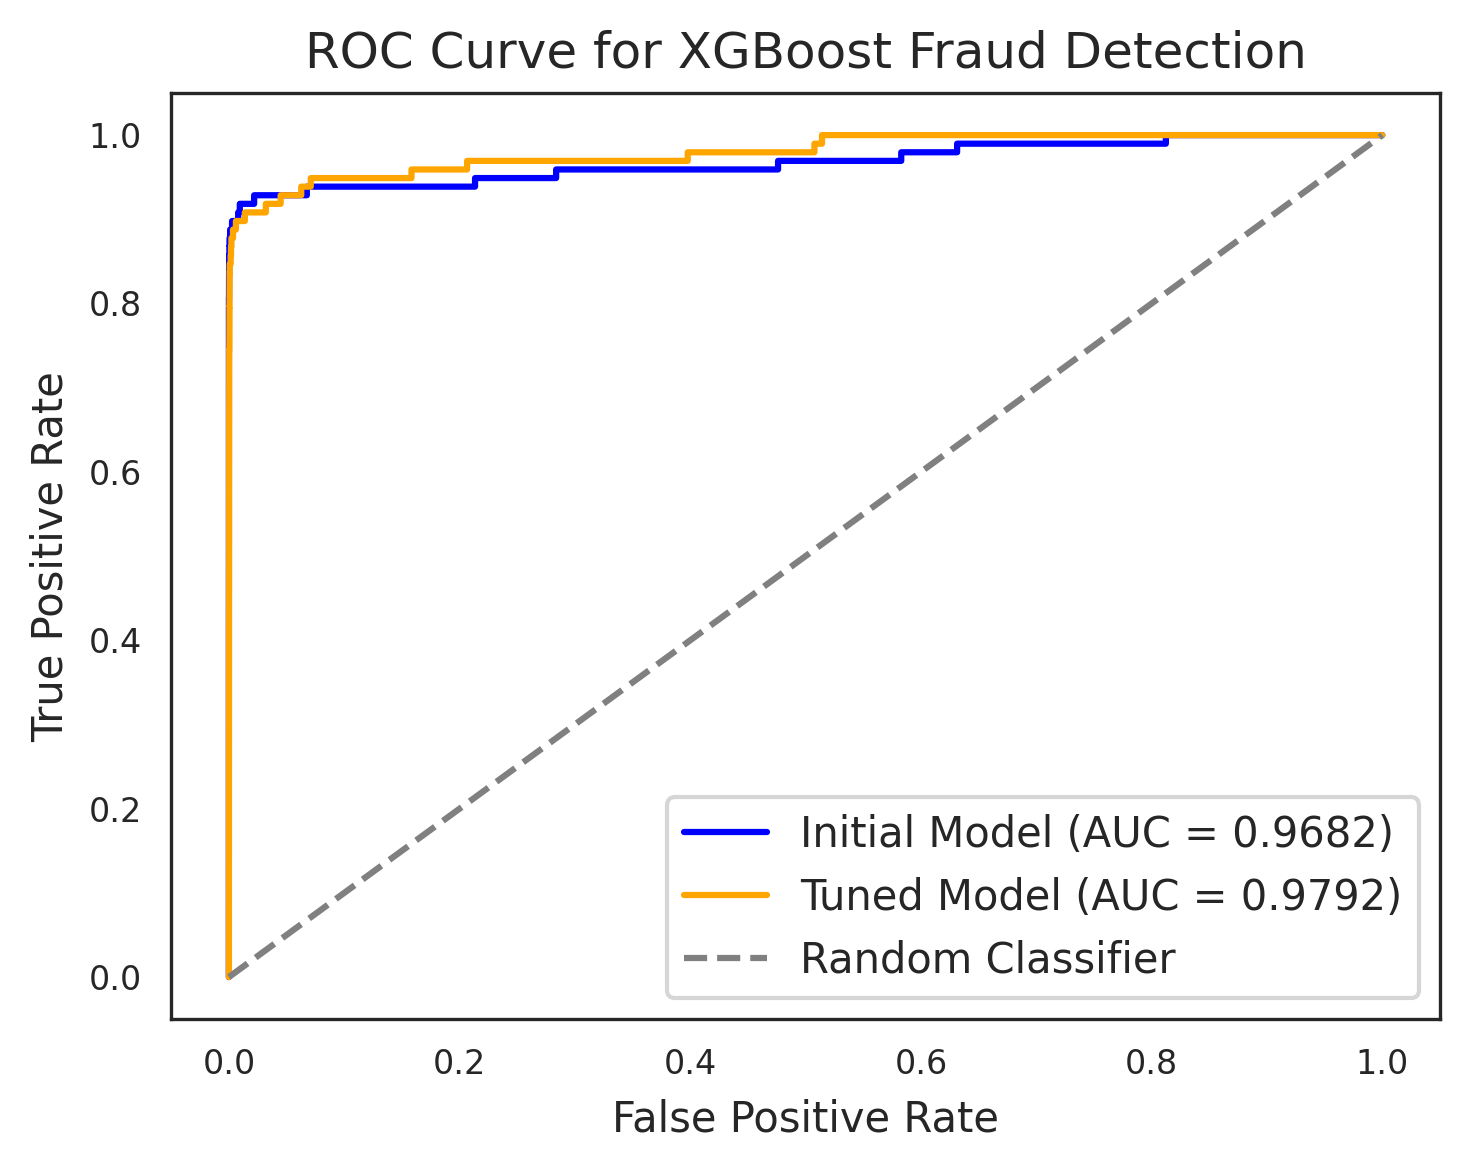

<Figure size 1920x1440 with 0 Axes>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import GridSearchCV
import joblib


model = XGBClassifier(random_state=42, eval_metric='auc', n_estimators=100, max_depth=6,
                      scale_pos_weight=scale_pos_weight)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
cm = confusion_matrix(y_test, y_pred)


# Plot ROC curve for initial model
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label=f'Initial Model (AUC = {auc:.4f})', color='blue')

# If tuned model exists, add its ROC curve
try:
    best_model = joblib.load('xgboost_fraud_model_best.pkl')
    y_pred_best = best_model.predict(X_test)
    y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]
    auc_best = roc_auc_score(y_test, y_pred_proba_best)
    fpr_best, tpr_best, _ = roc_curve(y_test, y_pred_proba_best)
    plt.plot(fpr_best, tpr_best, label=f'Tuned Model (AUC = {auc_best:.4f})', color='orange')
except FileNotFoundError:
    print("Tuned model not found; plotting only initial model ROC curve")

# Add diagonal line (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

# Customize plot
plt.title('ROC Curve for XGBoost Fraud Detection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()
plt.clf()

In [23]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import recall_score

iso_forest = IsolationForest(contamination=0.00172, random_state=42)
iso_forest.fit(X_train)
y_pred_iso = iso_forest.predict(X_test)  # -1 = anomaly
y_pred_iso = (y_pred_iso == -1).astype(int)
combined_pred = (y_pred_best & y_pred_iso)
print("Combined Model Recall:", recall_score(y_test, combined_pred))

Combined Model Recall: 0.336734693877551


X_train Shape: (227845, 30)
X_test Shape: (56962, 30)
y_train Shape: (227845,)
y_test Shape: (56962,)
y_train Class Distribution:
 0    0.998271
1    0.001729
Name: proportion, dtype: float64
Loaded tuned XGBoost model
XGBoost Recall: 0.8878
Isolation Forest Recall: 0.3367
Hybrid Model Recall: 0.3367
Hybrid Model Confusion Matrix:
 [[56852    12]
 [   65    33]]


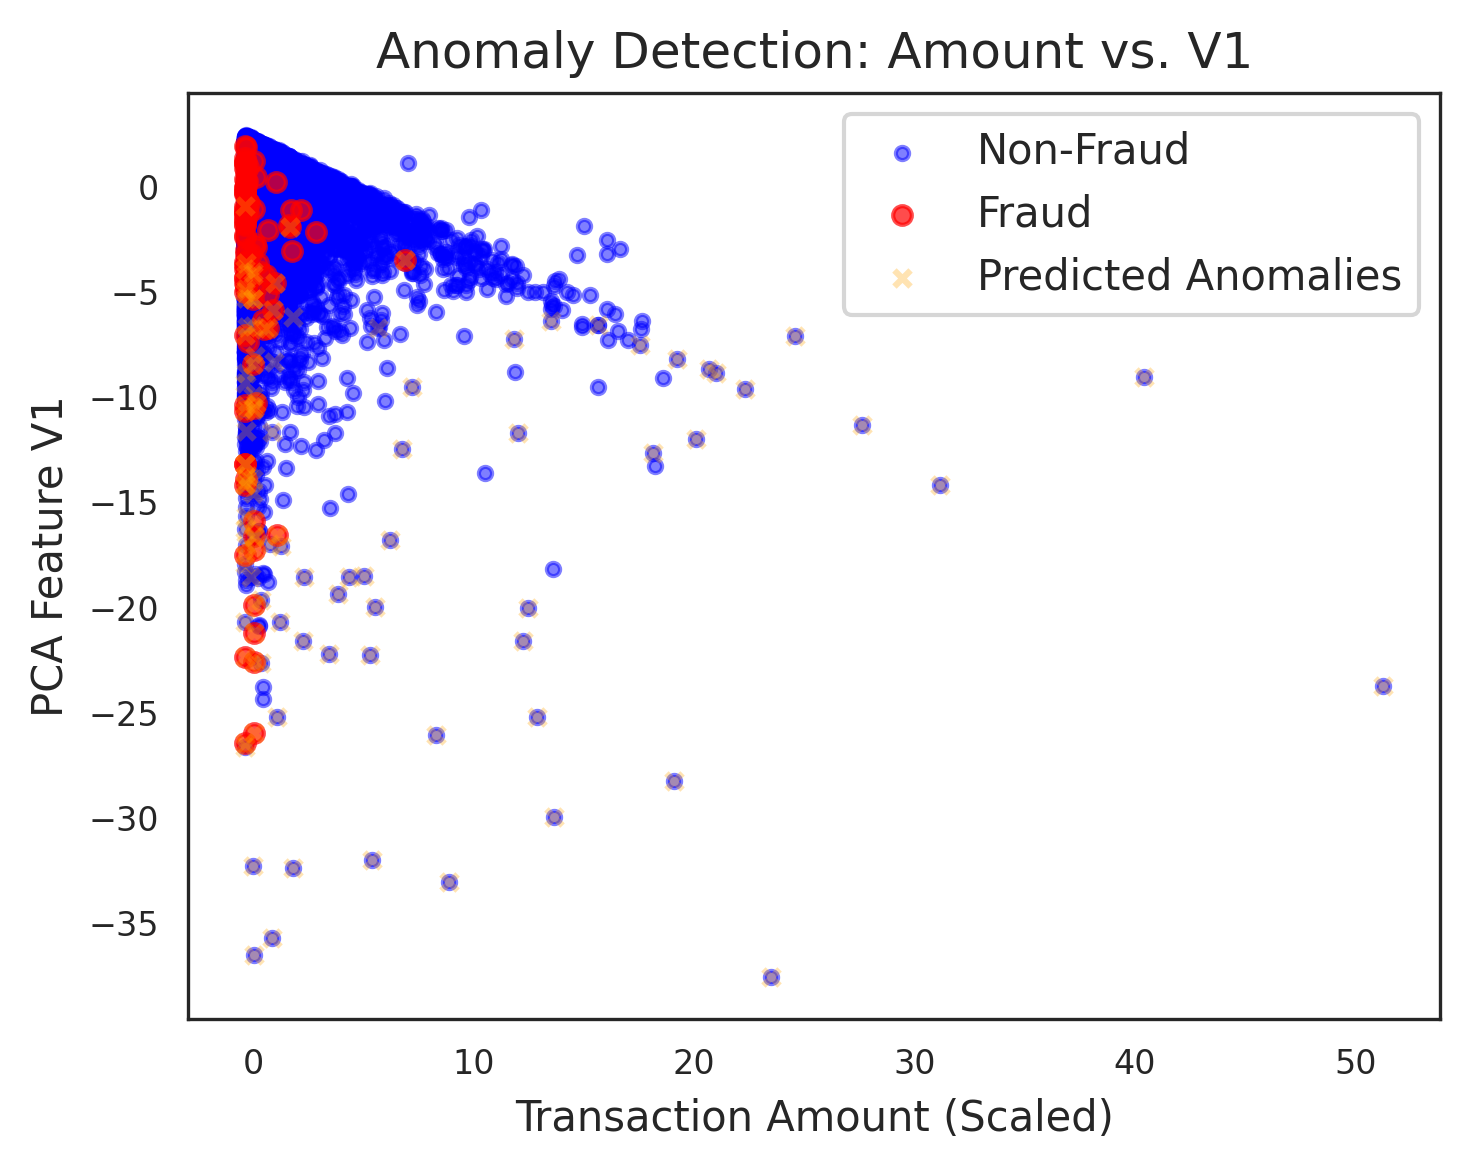

<Figure size 1920x1440 with 0 Axes>

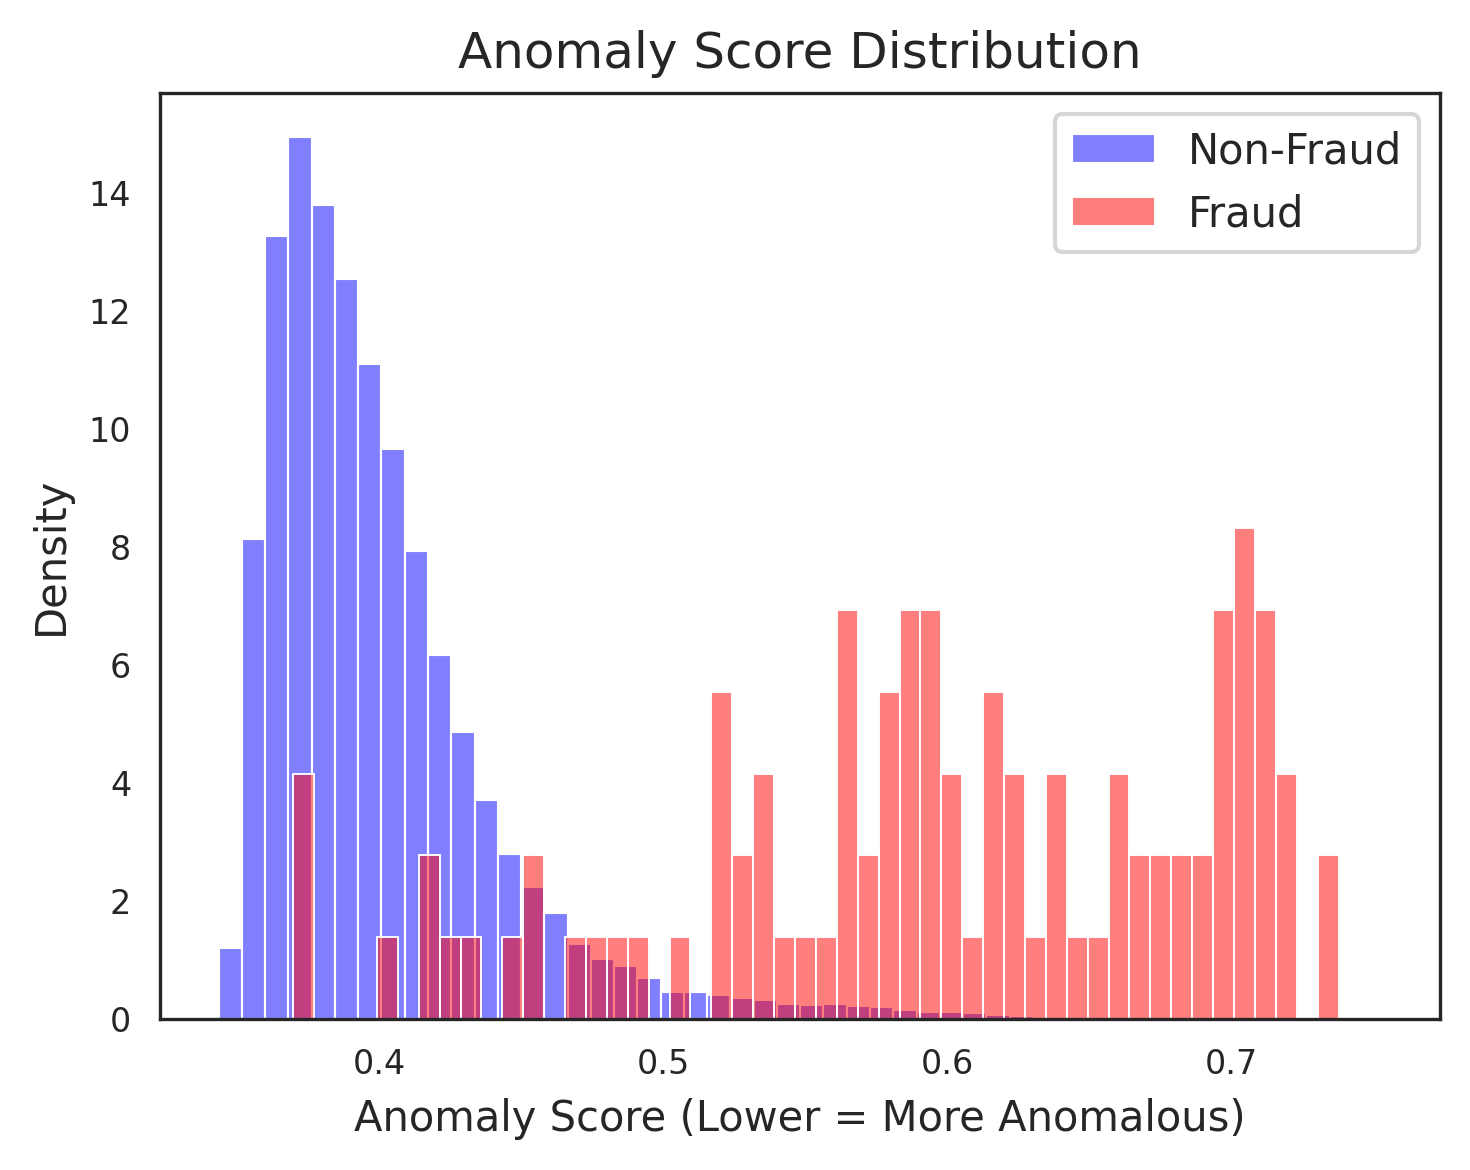

<Figure size 1920x1440 with 0 Axes>

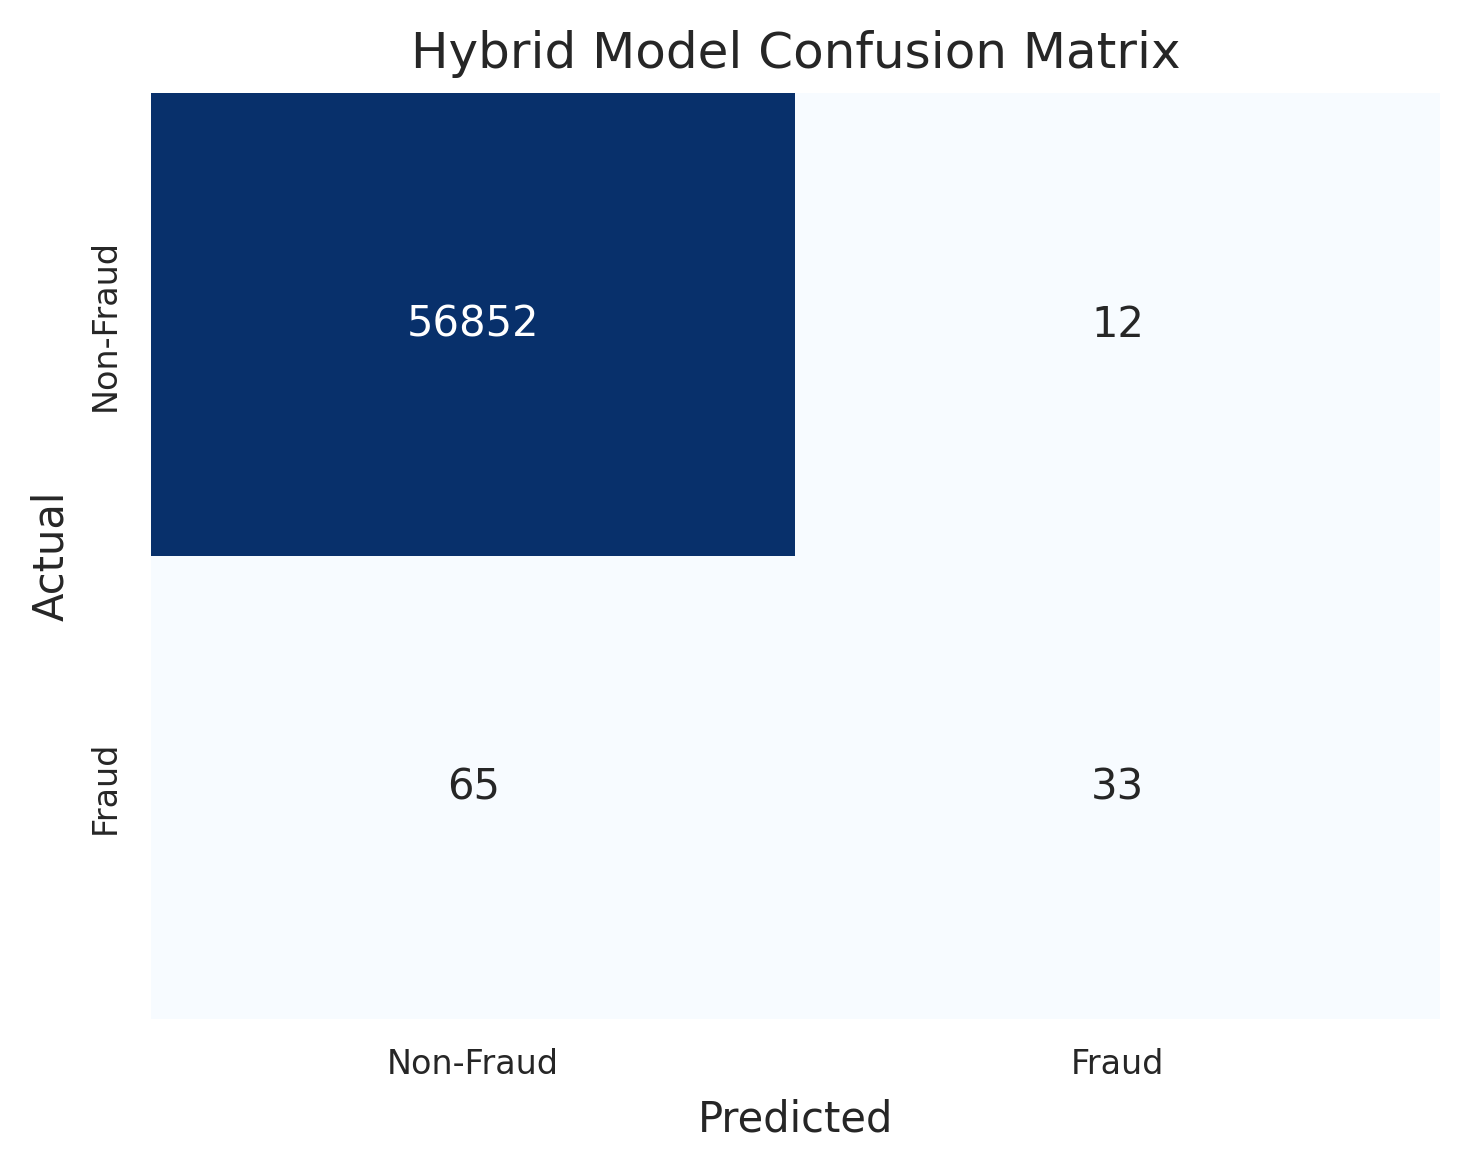

<Figure size 1920x1440 with 0 Axes>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import recall_score, confusion_matrix
from xgboost import XGBClassifier
import joblib

# Verify shapes
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)
print("y_train Class Distribution:\n", pd.Series(y_train).value_counts(normalize=True))

# Step 2: Load XGBoost model (use tuned model if available, else initial)
try:
    model = joblib.load('xgboost_fraud_model_best.pkl')
    print("Loaded tuned XGBoost model")
except FileNotFoundError:
    model = joblib.load('xgboost_fraud_model.pkl')
    print("Loaded initial XGBoost model")

# Get XGBoost predictions
y_pred_xgb = model.predict(X_test)
y_pred_proba_xgb = model.predict_proba(X_test)[:, 1]

# Step 3: Train Isolation Forest
iso_forest = IsolationForest(contamination=0.00172, random_state=42, n_estimators=100)
iso_forest.fit(X_train)

# Predict anomalies (-1 = anomaly, 1 = normal)
y_pred_iso = iso_forest.predict(X_test)
y_pred_iso = (y_pred_iso == -1).astype(int)  # Convert to 0 (normal) or 1 (fraud)

# Step 4: Combine predictions (hybrid model)
combined_pred = (y_pred_xgb & y_pred_iso)  # Fraud if both models predict fraud

# Step 5: Evaluate recall
recall_xgb = recall_score(y_test, y_pred_xgb)
recall_iso = recall_score(y_test, y_pred_iso)
recall_combined = recall_score(y_test, combined_pred)

print(f"XGBoost Recall: {recall_xgb:.4f}")
print(f"Isolation Forest Recall: {recall_iso:.4f}")
print(f"Hybrid Model Recall: {recall_combined:.4f}")

# Confusion matrix for hybrid model
cm_combined = confusion_matrix(y_test, combined_pred)
print("Hybrid Model Confusion Matrix:\n", cm_combined)

# Step 6: Visualize anomalies
# Scatter plot: Amount vs. V1, colored by anomaly status
plt.figure(figsize=(5, 4))
# Plot non-fraud (actual)
plt.scatter(X_test[y_test == 0]['Amount'], X_test[y_test == 0]['V1'],
            c='blue', alpha=0.5, label='Non-Fraud', s=10)
# Plot fraud (actual)
plt.scatter(X_test[y_test == 1]['Amount'], X_test[y_test == 1]['V1'],
            c='red', alpha=0.7, label='Fraud', s=20)
# Plot predicted anomalies
plt.scatter(X_test[y_pred_iso == 1]['Amount'], X_test[y_pred_iso == 1]['V1'],
            c='orange', alpha=0.3, label='Predicted Anomalies', s=15, marker='x')
plt.title('Anomaly Detection: Amount vs. V1')
plt.xlabel('Transaction Amount (Scaled)')
plt.ylabel('PCA Feature V1')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.savefig('anomaly_scatter.png', dpi=300, bbox_inches='tight')
plt.show()
plt.clf()

# Histogram of anomaly scores
anomaly_scores = -iso_forest.score_samples(X_test)  # Lower scores = more anomalous
plt.figure(figsize=(5, 4))
sns.histplot(data=anomaly_scores[y_test == 0], bins=50, color='blue', label='Non-Fraud', alpha=0.5, stat='density')
sns.histplot(data=anomaly_scores[y_test == 1], bins=50, color='red', label='Fraud', alpha=0.5, stat='density')
plt.title('Anomaly Score Distribution')
plt.xlabel('Anomaly Score (Lower = More Anomalous)')
plt.ylabel('Density')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.savefig('anomaly_score_histogram.png', dpi=600, bbox_inches='tight')
plt.show()
plt.clf()

# Plot confusion matrix for hybrid model
plt.figure(figsize=(5, 4))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Hybrid Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud', 'Fraud'])
plt.yticks([0.5, 1.5], ['Non-Fraud', 'Fraud'])
plt.grid(False)
plt.tight_layout()
plt.savefig('confusion_matrix_hybrid.png', dpi=300, bbox_inches='tight')
plt.show()
plt.clf()